#Resize With Nearest Neighbor

AxesImage(size=(100, 100))


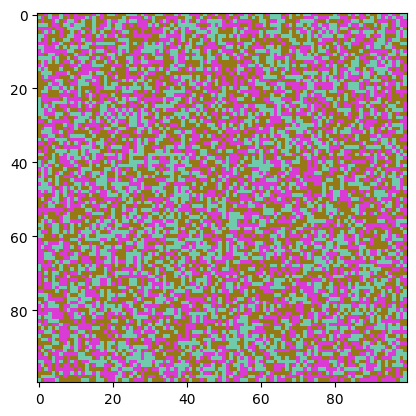

In [25]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
image = plt.imshow(mpimg.imread('small_color.png'))
print(image)
#plt.show()

AxesImage(size=(150, 150))


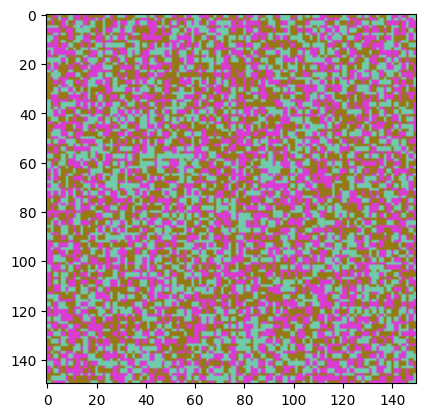

In [36]:
import numpy as np
import cv2
import math
img = cv2.imread('small_color.png', 1)
width, height, color = img.shape


new_width = 400
new_height = 400
old_width = width
old_height = height
img_nn = np.empty((new_width, new_height, color), dtype=np.uint8)
x_ratio = float(old_width/float(new_width))
y_ratio = float(old_height/float(new_height))
for i in range(0, new_width):
    for j in range(0, new_height):
        p_x = math.floor(j*x_ratio)
        p_y = math.floor(i*y_ratio)
        img_nn[j, i] = img[int(p_x), int(p_y)]
cv2.imwrite("nn.png", img_nn)
print(plt.imshow(mpimg.imread('nn.png')))


#Resize With Bilinear

In [34]:
def GetBilinearPixel(imArr, posX, posY):
        out = [] 
        modXi = int(posX)
        modYi = int(posY)
        modXf = posX - modXi
        modYf = posY - modYi
        modXiPlusOneLim = min(modXi+1,imArr.shape[1]-1)
        modYiPlusOneLim = min(modYi+1,imArr.shape[0]-1)
 
      
        for chan in range(imArr.shape[2]):
                bl = imArr[modYi, modXi, chan]
                br = imArr[modYi, modXiPlusOneLim, chan]
                tl = imArr[modYiPlusOneLim, modXi, chan]
                tr = imArr[modYiPlusOneLim, modXiPlusOneLim, chan]
 
               
                b = modXf * br + (1. - modXf) * bl
                t = modXf * tr + (1. - modXf) * tl
                pxf = modYf * t + (1. - modYf) * b
                out.append(int(pxf+0.5))
       
        return out


In [37]:

img = cv2.imread('small_color.png', 1)
width, height, color = img.shape

w2=400
h2=400
w1=width
h1=height
img_bl = np.empty((w2,h2,color), dtype=np.uint8)
x_ratio=float(w1/float(w2))
y_ratio=float(h1/float(h2))

AxesImage(size=(400, 400))


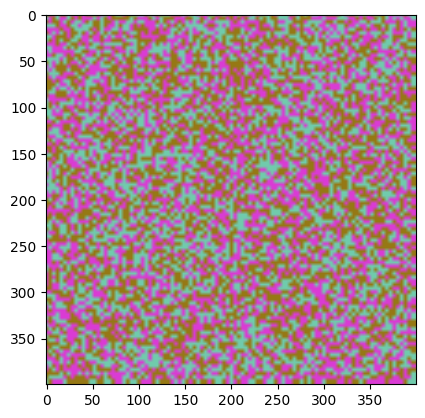

In [39]:
for i in range(0, w2):
    for j in range(0, h2):
        orir = i * x_ratio  # Tìm vị trí ở ảnh cũ
        oric = j * y_ratio

        img_bl[i, j] = GetBilinearPixel(img, oric, orir)
cv2.imwrite("bl.png", img_bl)
print(plt.imshow(mpimg.imread('bl.png')))
